# Data Analysis Interview Challenge

## Part 1 ‑ Exploratory data analysis

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from pprint import pprint
from datetime import datetime
from pandas.io.json import json_normalize

### Load JSON data

In [2]:
# load as Pandas dataframe
df = pd.read_json('logins.json')

### Exploratory data analysis

In [3]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
df.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [5]:
df.shape

(93142, 1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [7]:
df['login_time'] = pd.to_datetime(df['login_time'], utc=True, format='%Y-%m-%d %H:%M')

# Create a series of the timestamps
login_df= pd.Series(range(len(df)), index = df.login_time)

df['year'] = df['login_time'].dt.year
df['month'] = df['login_time'].dt.month
df['date'] = df['login_time'].dt.day
df['wk'] = df['login_time'].dt.day_name()
df['hour'] = df['login_time'].dt.hour
df['minute'] = df['login_time'].dt.minute
df['second'] = df['login_time'].dt.second
df.head()

,login_time,year,month,date,wk,hour,minute,second
0,1970-01-01 20:13:18+00:00,1970,1,1,Thursday,20,13,18
1,1970-01-01 20:16:10+00:00,1970,1,1,Thursday,20,16,10
2,1970-01-01 20:16:37+00:00,1970,1,1,Thursday,20,16,37
3,1970-01-01 20:16:36+00:00,1970,1,1,Thursday,20,16,36
4,1970-01-01 20:26:21+00:00,1970,1,1,Thursday,20,26,21


__Aggregate login counts based on 15 minute time intervals__

In [8]:
df_15 = login_df.resample('15T').count()
df_15.head()

login_time
1970-01-01 20:00:00+00:00    2
1970-01-01 20:15:00+00:00    6
1970-01-01 20:30:00+00:00    9
1970-01-01 20:45:00+00:00    7
1970-01-01 21:00:00+00:00    1
Freq: 15T, dtype: int64

In [9]:
df_15.sort_values(ascending=False)

login_time
1970-03-01 04:30:00+00:00    73
1970-04-04 05:30:00+00:00    66
1970-04-04 01:30:00+00:00    64
1970-04-04 01:15:00+00:00    63
1970-04-01 23:30:00+00:00    60
                             ..
1970-04-08 08:45:00+00:00     0
1970-01-30 06:30:00+00:00     0
1970-01-30 05:45:00+00:00     0
1970-02-11 06:45:00+00:00     0
1970-01-27 07:00:00+00:00     0
Length: 9788, dtype: int64

In [10]:
print('First timestamp: {}'.format(df_15.index.min())) 
print('Last timestamp: {}'.format(df_15.index.max())) 

First timestamp: 1970-01-01 20:00:00+00:00
Last timestamp: 1970-04-13 18:45:00+00:00


The data set contain records of the user login information from 1st January 1970 to 13th April 1970.

We will observe the user logins of each month, starting in January.

D:\Programs\Anaconda3_072019\envs\dsenv2\lib\site-packages\pandas\core\arrays\datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


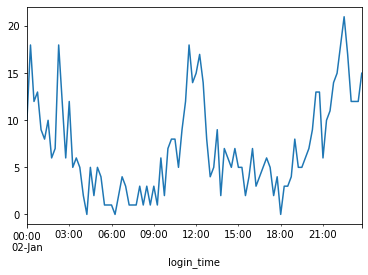

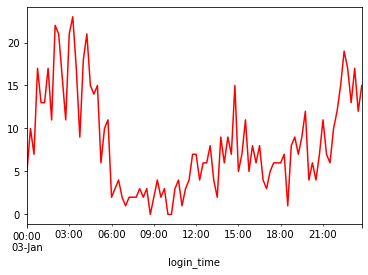

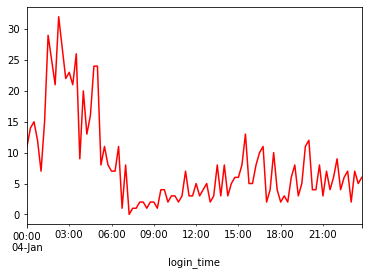

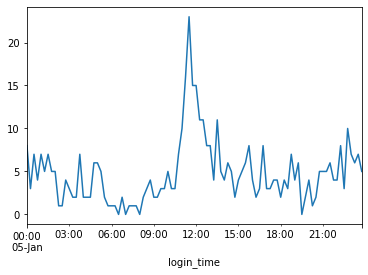

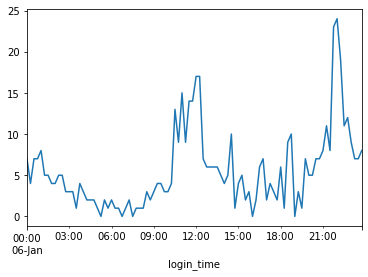

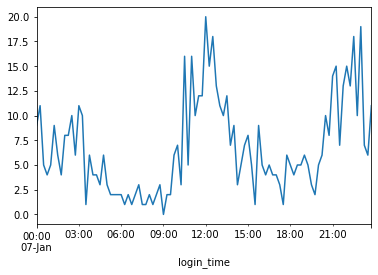

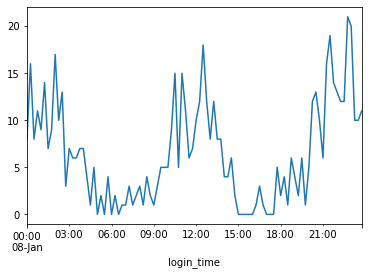

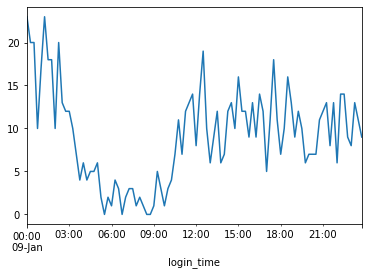

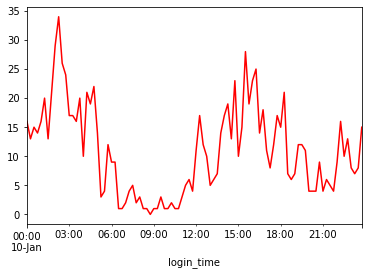

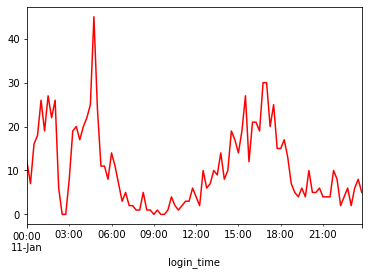

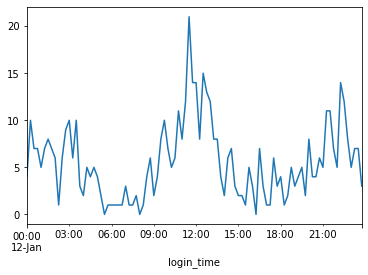

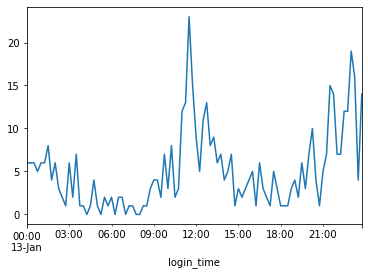

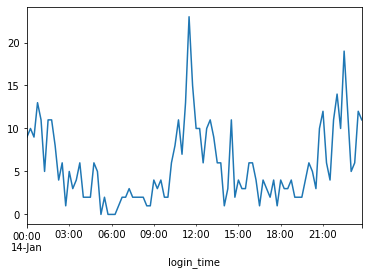

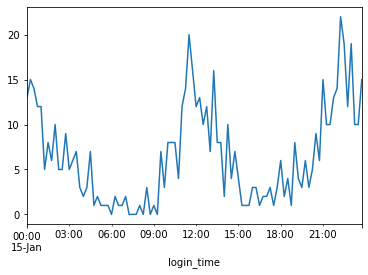

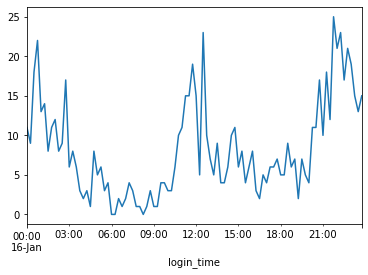

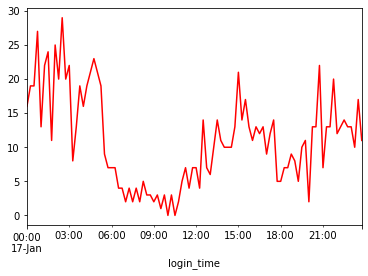

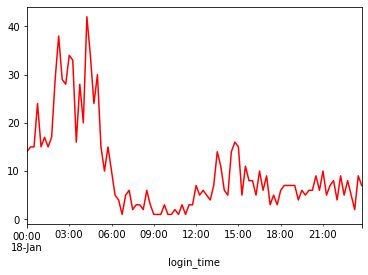

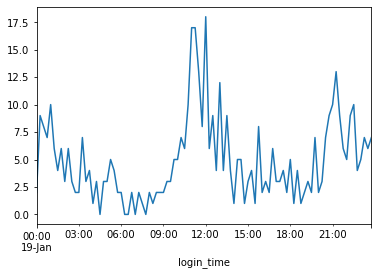

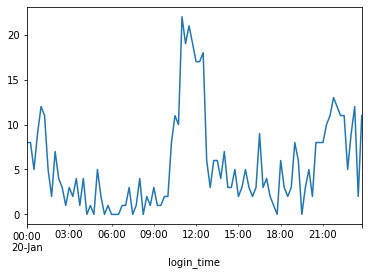

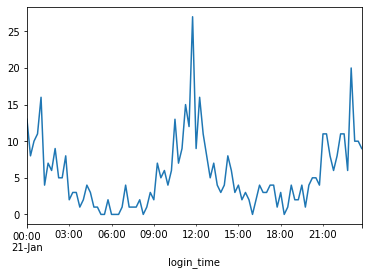

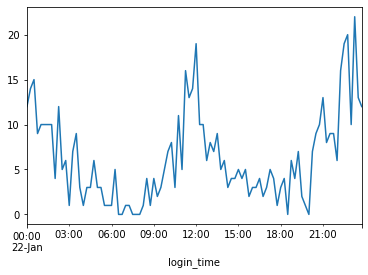

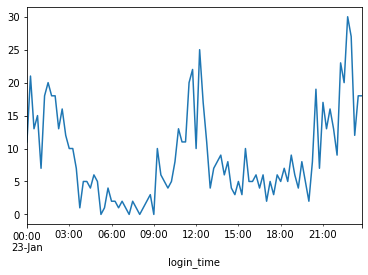

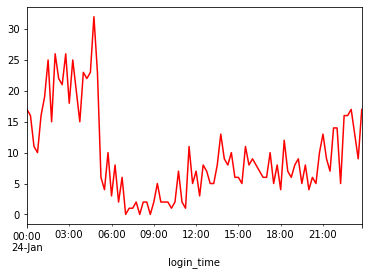

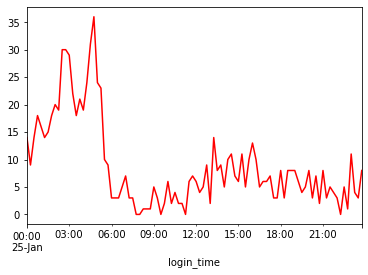

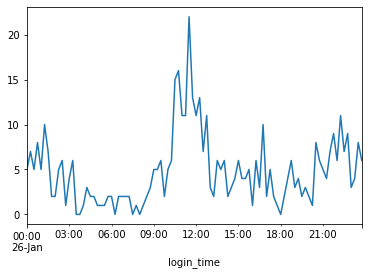

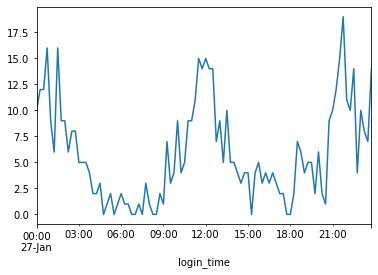

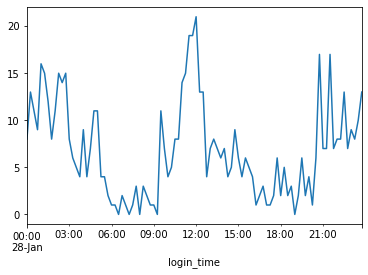

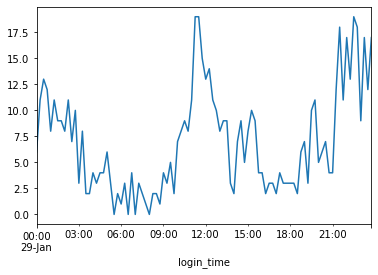

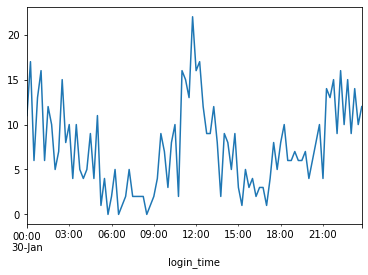

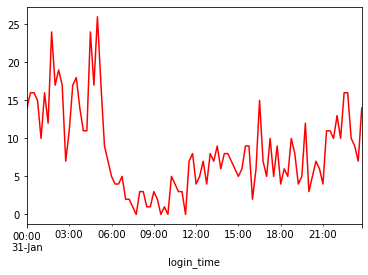

In [11]:
for i in range(2,32):
    #extract daily timestamps one by one
    day = '1970-01-{}'.format(i)
    date = df_15.loc[day:day]
    
    #If the current day is a weekend (Saturday or Sunday) color it red
    if i in [3,4,10,11,17,18,24,25,31]:
        date.plot(color='r')
        plt.show()
    #Plot weekdays as blue
    else:
        date.plot()
        plt.show()

In January, for weekdays the user logins are high around noon. The user logins are low in the morning and evening. As for the weekends, normally the user logins are low throughout the day and high only during midnight.

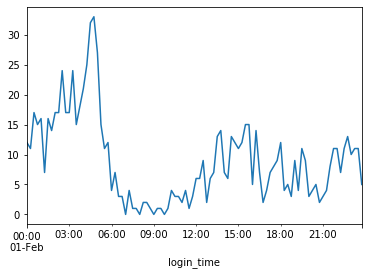

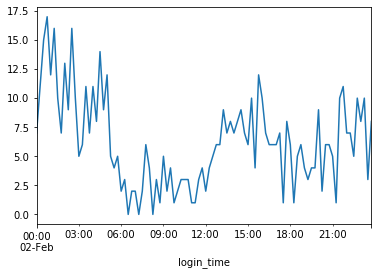

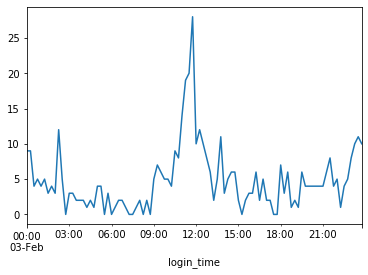

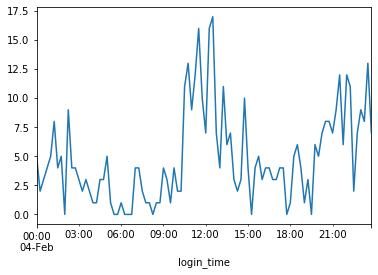

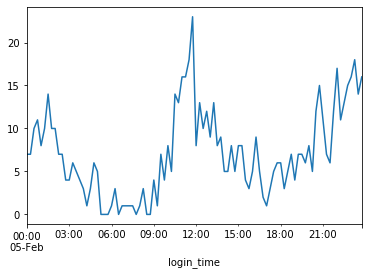

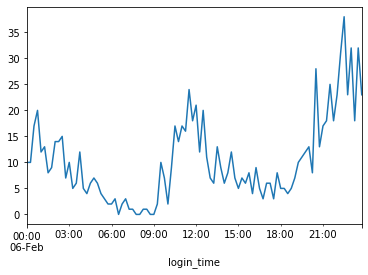

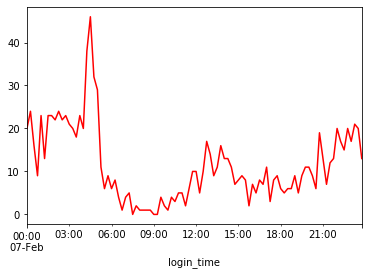

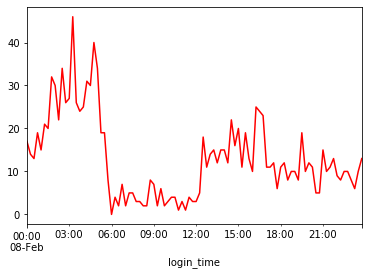

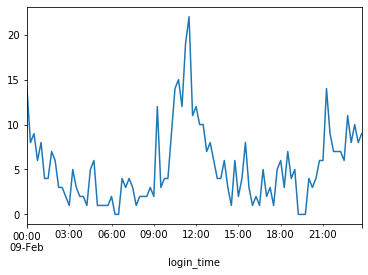

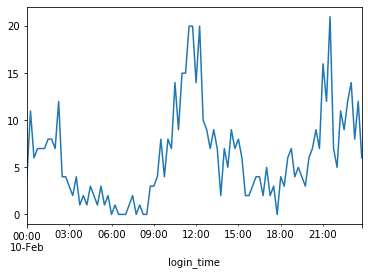

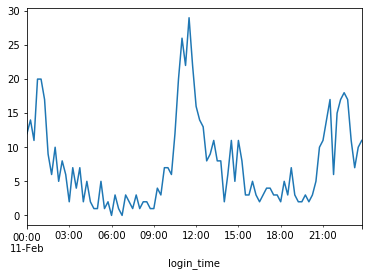

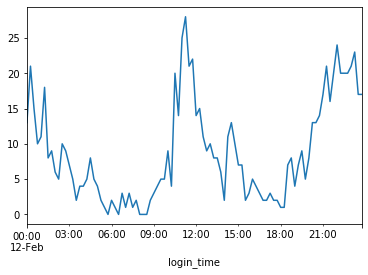

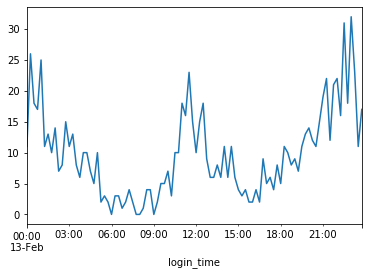

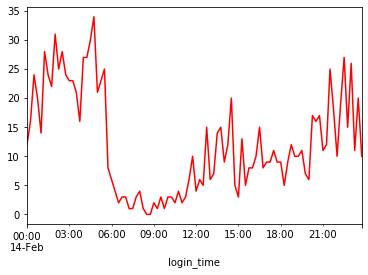

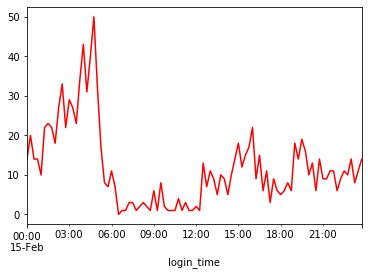

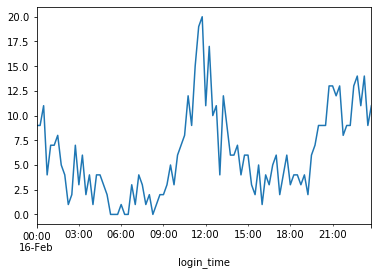

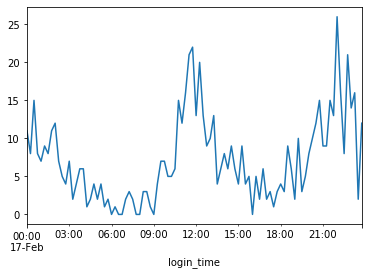

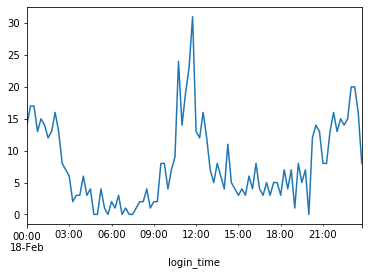

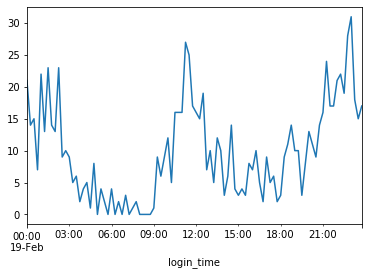

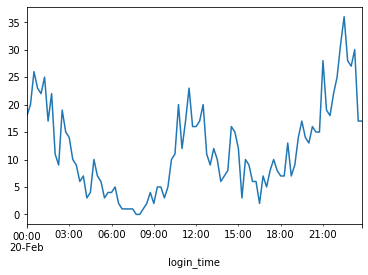

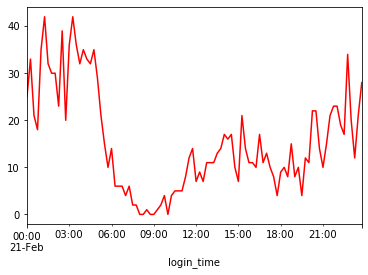

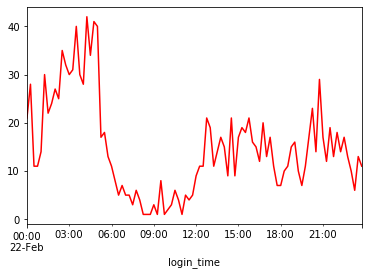

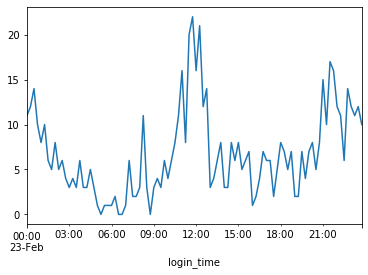

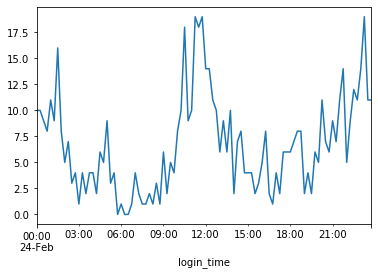

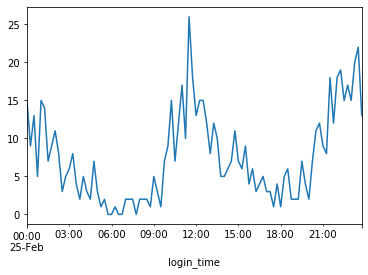

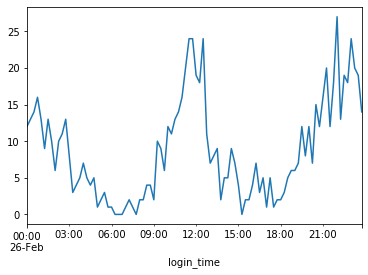

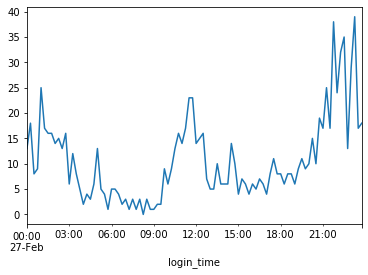

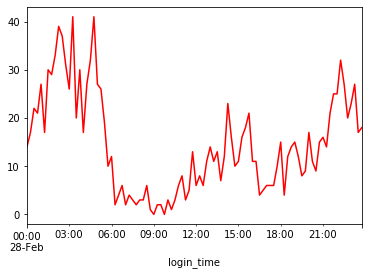

In [12]:
for i in range(1,29):
    #extract daily timestamps one by one
    day = '1970-02-{}'.format(i)
    date = df_15.loc[day:day]
    
    #If the current day is a weekend (Saturday or Sunday) color it red
    if i in [7,8,14,15,21,22,28]:
        date.plot(color='r')
        plt.show()
    #Plot weekdays as blue
    else:
        date.plot()
        plt.show()

In February, for weekdays the user logins are high around noon. The user logins are low in the morning and evening. However, it is high at midnight. As for the weekends, normally the user logins are low throughout the day and high only at midnight.

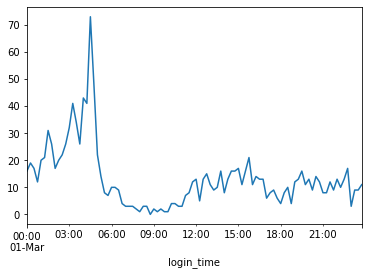

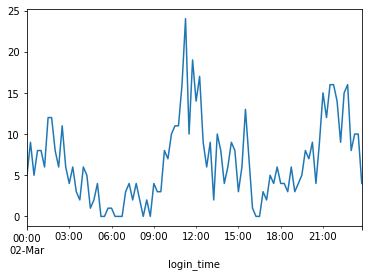

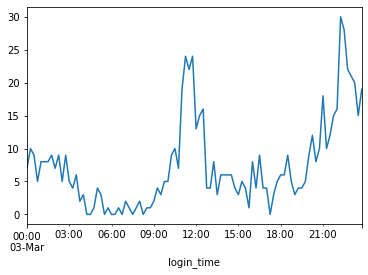

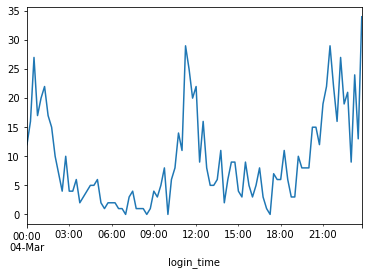

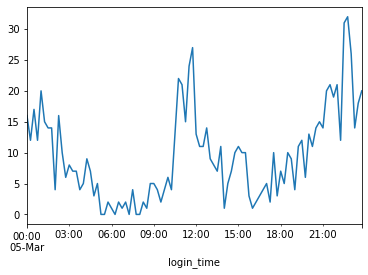

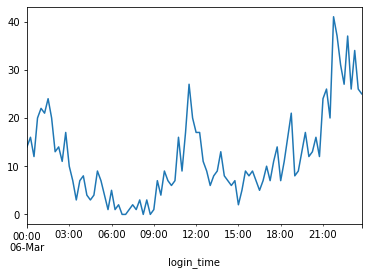

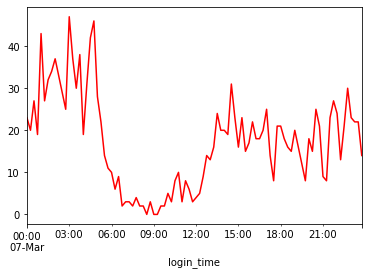

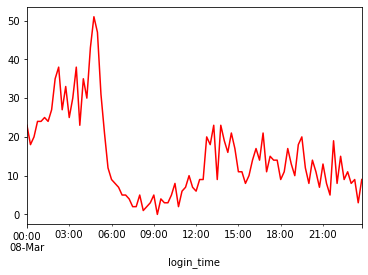

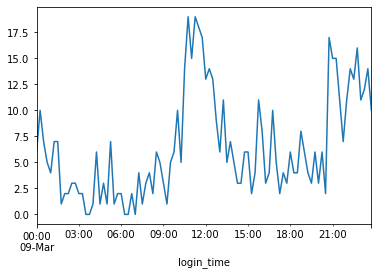

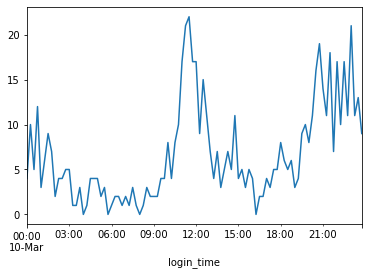

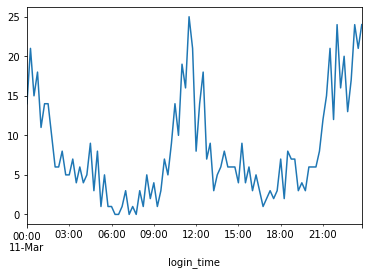

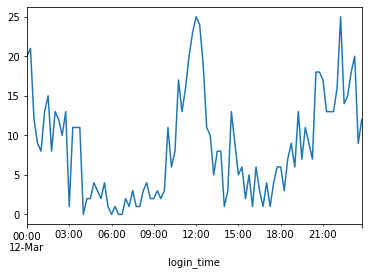

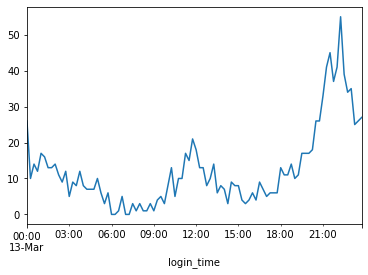

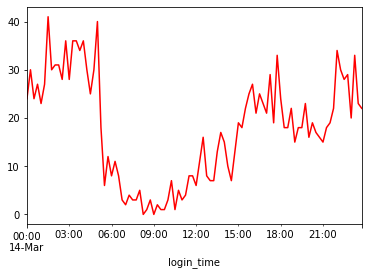

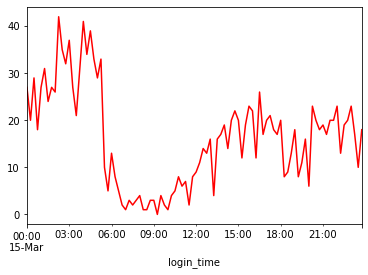

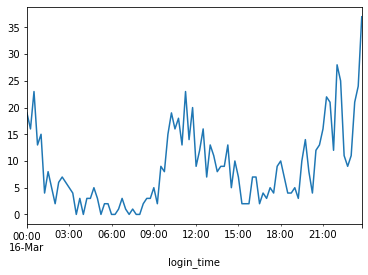

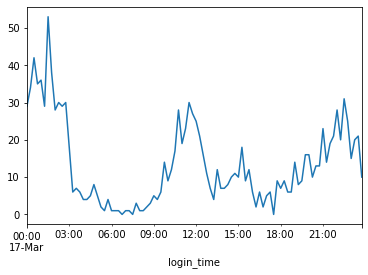

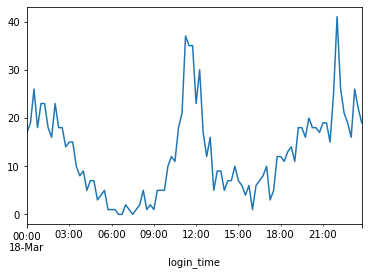

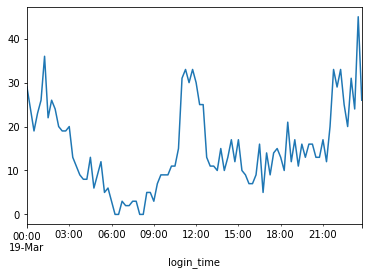

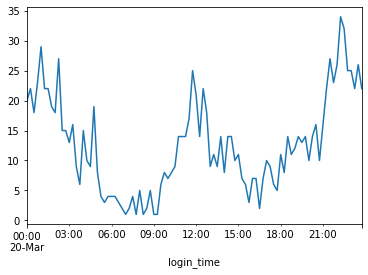

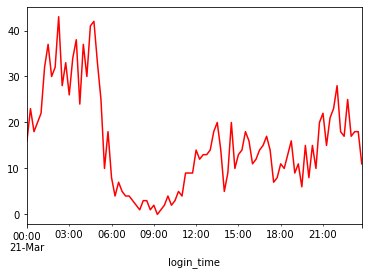

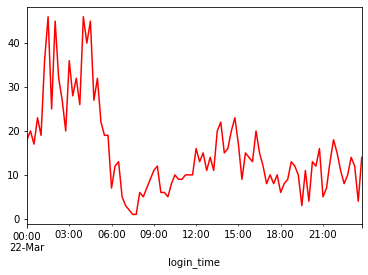

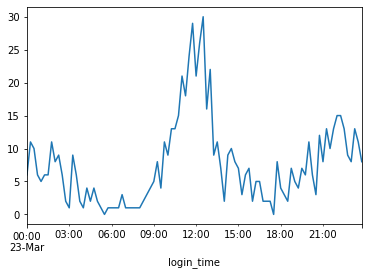

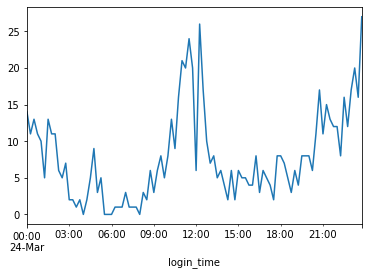

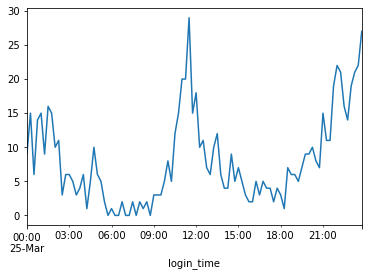

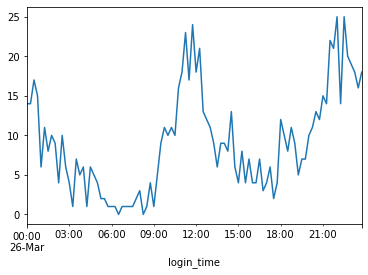

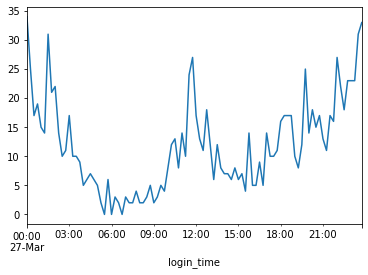

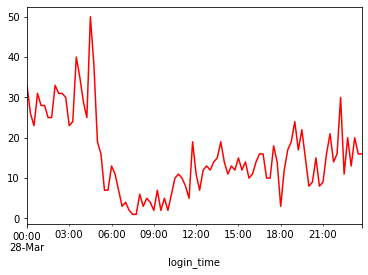

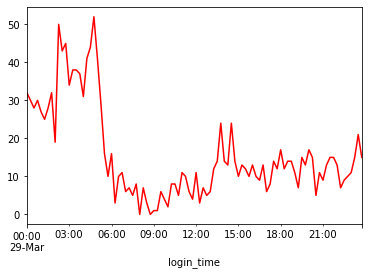

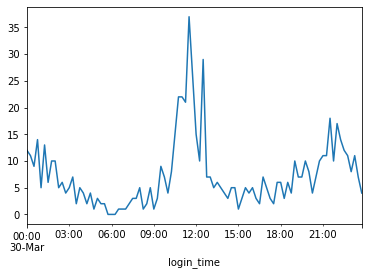

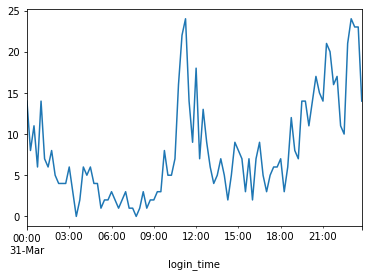

In [13]:
for i in range(1,32):
    #extract daily timestamps one by one
    day = '1970-03-{}'.format(i)
    date = df_15.loc[day:day]
    
    #If the current day is a weekend (Saturday or Sunday) color it red
    if i in [7,8,14,15,21,22,28,29]:
        date.plot(color='r')
        plt.show()
    #Plot weekdays as blue
    else:
        date.plot()
        plt.show()

In March, for weekdays the user logins are high around noon. The user logins are low in the morning and evening. It is high at midnight. As for the weekends, normally the user logins are low throughout the day and high only at midnight. However, we can observe that for some cases the user logins have been reversed for weekdays and weekends.

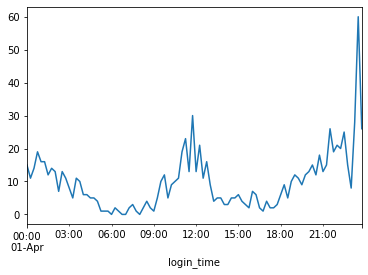

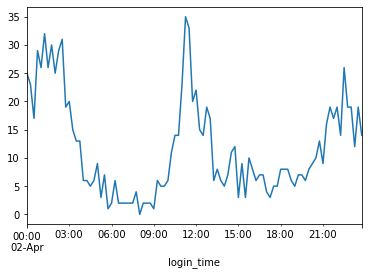

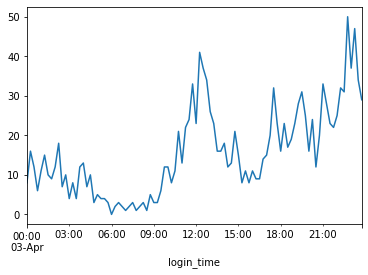

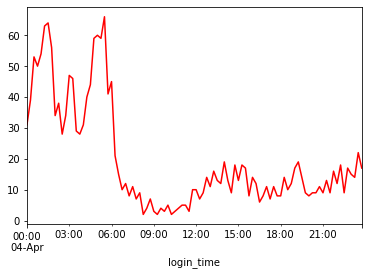

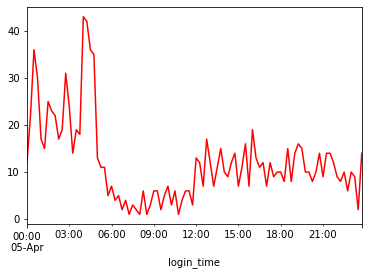

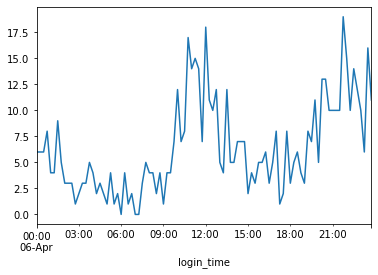

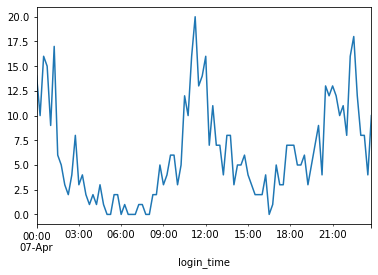

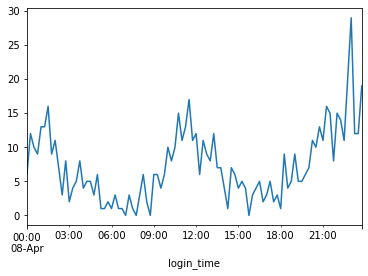

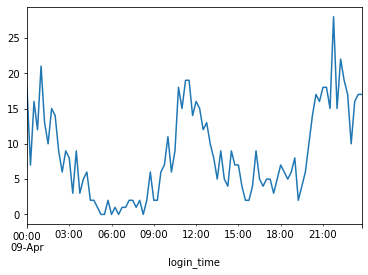

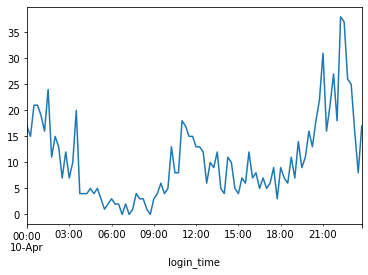

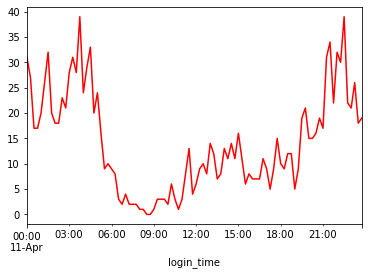

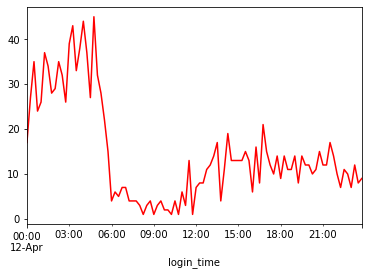

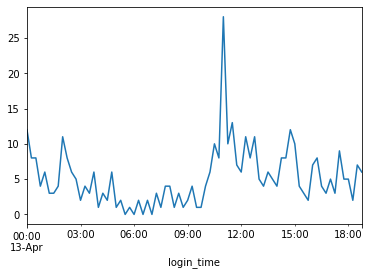

In [14]:
for i in range(1,14):
    #extract daily timestamps one by one
    day = '1970-04-{}'.format(i)
    date = df_15.loc[day:day]
    
    #If the current day is a weekend (Saturday or Sunday) color it red
    if i in [4,5,11,12]:
        date.plot(color='r')
        plt.show()
    #Plot weekdays as blue
    else:
        date.plot()
        plt.show()

In April, for weekdays the user logins are high around noon. The user logins are low in the morning and evening. It is high at midnight. As for the weekends, normally the user logins are low throughout the day and high only at midnight. 

In [15]:
#Create a dataframe of the time series
day_data = pd.DataFrame(df_15, columns =['count'])

# Create a column converting the timestamp to it's corresponding day of the week 
# 0 = Monday | 1 = Tuesday | 2 = Wednesday | 3 = Thursday | 4 = Friday | 5 = Saturday | 6 = Sunday
day_data['day_of_week'] = df_15.index.dayofweek
day_data.head(10)

,count,day_of_week
login_time,,
1970-01-01 20:00:00+00:00,2,3
1970-01-01 20:15:00+00:00,6,3
1970-01-01 20:30:00+00:00,9,3
1970-01-01 20:45:00+00:00,7,3
1970-01-01 21:00:00+00:00,1,3
1970-01-01 21:15:00+00:00,4,3
1970-01-01 21:30:00+00:00,0,3
1970-01-01 21:45:00+00:00,4,3
1970-01-01 22:00:00+00:00,9,3


We have created a plot_day function that plots the user logins according to the day of the week from the 15-minute sample data.

In [16]:
def plot_day(df, day, color = None):
    week = {'monday':0,'tuesday':1,'wednesday':2,'thursday':3,'friday':4,'saturday':5,'sunday':6}
    map_day = week[day]
    
    filtered_day = df[df.day_of_week == map_day]
    times = filtered_day.index
    filtered_day = filtered_day.groupby([times.hour, times.minute]).sum()

    filtered_day['count'].plot(color = color)
    plt.xlabel('Time of Day')
    plt.ylabel('Login Count')
    plt.title(day.title())
    plt.xticks([])

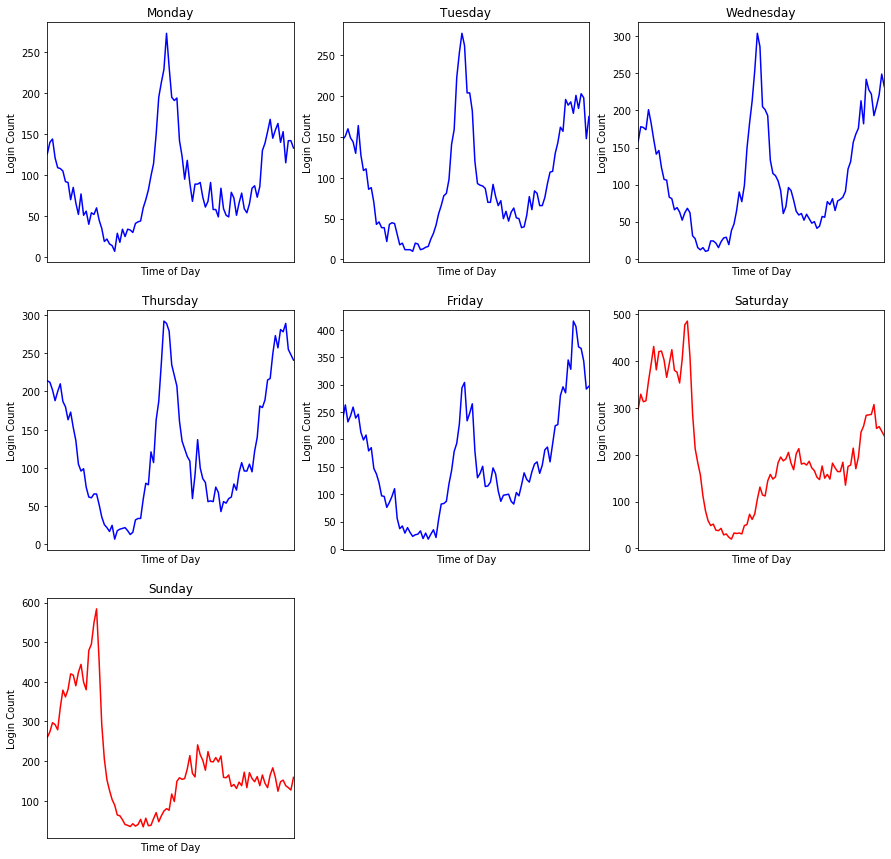

In [17]:
plt.subplots(nrows=3,ncols=3, figsize = (15,15))
ax1 = plt.subplot(3,3,1)
plot_day(day_data, 'monday', color = 'blue')

ax2 = plt.subplot(3,3,2)
plot_day(day_data, 'tuesday', color = 'blue')

ax3 = plt.subplot(3,3,3)
plot_day(day_data, 'wednesday', color = 'blue')

ax4 = plt.subplot(3,3,4)
plot_day(day_data, 'thursday', color = 'blue')

ax5 = plt.subplot(3,3,5)
plot_day(day_data, 'friday', color = 'blue')

ax6 = plt.subplot(3,3,6)
plot_day(day_data, 'saturday', color = 'red')

ax7 = plt.subplot(3,3,7)
plot_day(day_data, 'sunday', color = 'red')

ax8 = plt.subplot(3,3,8)
ax8.spines['right'].set_visible(False)
ax8.spines['top'].set_visible(False)
ax8.spines['left'].set_visible(False)
ax8.spines['bottom'].set_visible(False)
ax8.get_xaxis().set_ticks([])
ax8.get_yaxis().set_ticks([])

ax9 = plt.subplot(3,3,9)
ax9.spines['right'].set_visible(False)
ax9.spines['top'].set_visible(False)
ax9.spines['left'].set_visible(False)
ax9.spines['bottom'].set_visible(False)
ax9.get_xaxis().set_ticks([])
ax9.get_yaxis().set_ticks([])

plt.show()

From our analysis, we can observe the following trends from the 4 months 15-minute sample data.

- The highest user logins are at the noon followed by midnight for Monday to Thursday.
- For Friday the highest user logins are during the late-night followed by noon.
- On the weekends, the highest user logins are from midnight to early morning then we can observe a considerable drop.
- The highest number of user logins is on Sunday early morning, followed by Saturday early morning.